# Parametric vs. Nonparametric Bootstrap

Suppose we are at the W4 St station waiting on the A train to go uptown.  The amount of time between trains can be modeled as a random variable $X$ with an exponential distribution 
$$
f(x;\ \theta) = \frac{1}{\theta} e^{-x/\theta},\quad x \ge 0
$$
with $\theta$ being the average wait time in minutes.  We want to know how long we will have to wait for the train to come and maybe get an estimate of a reasonable time interval.  This is a statistical inference problem though!


1. The average time between trains is $\theta$, so really we want to estimate the value of $\theta$.

2. A reasonable time interval is just a confidence interval around our estimate of $\theta$.


To estimate $\theta$ you'll need some data.  Since you are really dedicated to solving this problem you go sit on the platform all day and measure the time between trains.  You collect the following 100 data points.

In [1]:
from scipy.stats import expon        # So we can use the exponential distribution in Python.
import numpy as np                   # So we can do numerical calculations.
from matplotlib import pyplot as plt # So we can plot our results.
np.random.seed(7)                    # Setting a random number seed.


n = 100 # Number of trains you observe.
data = expon.rvs(size = n, scale = 4.0)

for i in range(n):
    print("x{:d} = {:0.4f}".format(i + 1, data[i]))

x1 = 0.3175
x2 = 6.0550
x3 = 2.3079
x4 = 5.1417
x5 = 15.2649
x6 = 3.0931
x7 = 2.7816
x8 = 0.2991
x9 = 1.2503
x10 = 2.7716
x11 = 4.5481
x12 = 6.5132
x13 = 1.9182
x14 = 0.2728
x15 = 1.3595
x16 = 9.6138
x17 = 0.9601
x18 = 2.4068
x19 = 10.7066
x20 = 0.1009
x21 = 3.6707
x22 = 11.9933
x23 = 1.0470
x24 = 3.1806
x25 = 9.5932
x26 = 0.5716
x27 = 2.9644
x28 = 5.5517
x29 = 4.4227
x30 = 2.5226
x31 = 0.9169
x32 = 2.6994
x33 = 1.8633
x34 = 2.5958
x35 = 1.8221
x36 = 7.2786
x37 = 5.8553
x38 = 1.5075
x39 = 3.4004
x40 = 1.2921
x41 = 2.4121
x42 = 1.7415
x43 = 4.2848
x44 = 1.8504
x45 = 2.4580
x46 = 5.0822
x47 = 2.1309
x48 = 9.4759
x49 = 0.7960
x50 = 5.4055
x51 = 2.1953
x52 = 2.2237
x53 = 4.0246
x54 = 2.9602
x55 = 2.1438
x56 = 0.0057
x57 = 0.3872
x58 = 4.9432
x59 = 2.9723
x60 = 4.7650
x61 = 12.4462
x62 = 4.5943
x63 = 0.2184
x64 = 1.4776
x65 = 3.5918
x66 = 1.0721
x67 = 13.4063
x68 = 11.6052
x69 = 7.5461
x70 = 2.5571
x71 = 7.3674
x72 = 0.5622
x73 = 1.4769
x74 = 2.4870
x75 = 5.4168
x76 = 2.6608
x77 = 0.5888
x7

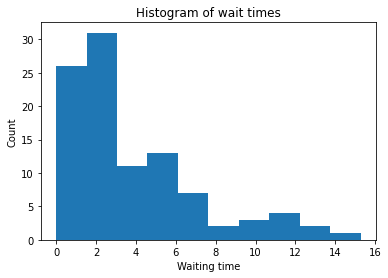

In [2]:
# Here's a histogram of the data.

plt.figure(1)
plt.title("Histogram of wait times")
plt.xlabel('Waiting time')
plt.ylabel('Count')
plt.hist(data);

## Estimating $\theta$

We need to decide on a method for estimating the value of $\theta$ given our data.  We could use method of moments, or maximum likelihood, or some other method.  Let's use MLE here.  Remember that the MLE for the parameter in an exponential distribution is
$$
\hat{\theta}_{\mathrm{MLE}} = \frac{1}{n}\sum_{i=1}^n X_i
$$
(The method of moments estimator is actually the same thing in this example).  All we need to do to estimate $\beta$ is to take the average of the data we observed.

In [3]:
mle = np.mean(data)
print("MLE = {:0.4f}".format(mle))

MLE = 3.8709


Great!  Now we know that the trains arrive on average every $3.8$ minutes (roughly 3 minutes and 48 seconds).  But trains don't arrive exactly every $3.8$ minutes so how accurate is our estimate?  To answer this question we'll use a 68% confidence interval (i.e. $\pm 1$ standard error).  Our estimate depends on the data we observed, but say we went on a different day and measured 100 more waiting times.  Then we would get a different estimate for $\hat{\theta}_{\mathrm{MLE}}$.  Let's simulate what would happen if we did this experiment say 365 times (we spent a whole year recording data).

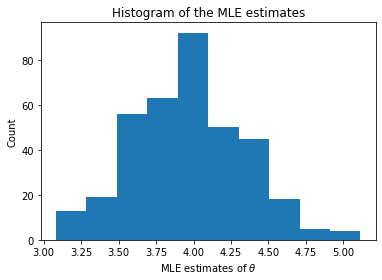

In [4]:
m = 365 # Number of times we do the experiment.

trials = np.zeros(m) # Some place to keep track of our experiments.
for i in range(m):
    new_data = expon.rvs(size = n, scale = 4.0)
    trials[i] = np.mean(new_data)

# Here's a histogram of all the different estimates we could have gotten.  Look familiar?
plt.figure(2)
plt.hist(trials)
plt.xlabel('MLE estimates of $\\theta$')
plt.ylabel('Count')
plt.title('Histogram of the MLE estimates');

It looks like a normal distribution centered around the true value of $\theta$.  This is because of the central limit theorem and is the whole idea behind asymptotic normality and consistency.  Depending on which day we came to collect our data we will get a different estimate according to this distribution.  The standard error of the estimate we got is just the standard deviation of this distribution.

## Bootstrap

Sitting for hours in the subway every day for a year, just to get an idea of how accuarate our estimate is, is not ideal.  Instead, let's just use the bootstrap.  We'll use $B = 365$ bootstrap replicates so it'll be just like if we came to the subway everyday for a year.  Let's start with the non-parametric bootstrap.

## Non-parametric bootstrap

The non-parametric bootstrap does not use any assumptions about our data and instead just resamples (with replacement) from the dataset we already worked so hard to collect.  Here's how it works.

Nonparametric Bootstrap SE estimate = 0.3257


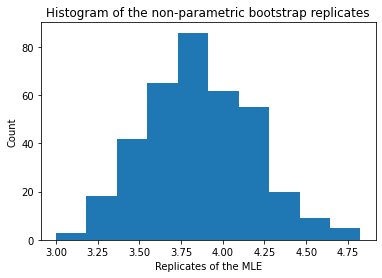

In [5]:
np.random.seed(7)
"""
Here's a method to draw n samples from our dataset with replacement.

Why is replacement important?  Because we want our resampled data to be iid.
"""
def resample(data, n):
    resampled_data = np.zeros(n)
    for i in range(n):
        random_index = np.random.randint(len(data)) # Get a random data point index.
        resampled_data[i] = data[random_index]
    return resampled_data
    

B = 365 # The number of bootstrap replicates.

replicates = np.zeros(B) # A place to store the results.
for b in range(B):
    # First resample the data.
    resampled_data = resample(data, n)
    # Compute the replicate estimate.
    replicates[b] = np.mean(resampled_data) # We are computing the MLE for the new data here.

# Here's a histrogram of the replicates.
plt.figure(3)
plt.hist(replicates)
plt.xlabel('Replicates of the MLE')
plt.ylabel('Count')
plt.title('Histogram of the non-parametric bootstrap replicates');
    
# Now use the formula to get the bootstrap estimate of the standard error.
se_nonparametric = np.std(replicates)
print('Nonparametric Bootstrap SE estimate = {:0.4f}'.format(se_nonparametric))

Now we have some idea of how accurate our MLE was and we can say that a 68% confidence interval for the average wait time in minutes is 
$$
3.87 \pm 0.33
$$
For reference, our estimate is off by about 20 seconds, so not bad.

## Parametric Bootstrap

The non-parametric bootstrap doesn't make any assumptions about the data.  However, we know that the data actually follows and exponential distribution.  The parametric bootstrap takes advantage of this.

Parametric Bootstrap SE estimate = 0.3564


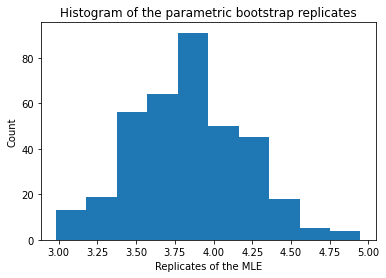

In [6]:
np.random.seed(7)
B = 365
replicates = np.zeros(B)
for b in range(B):
    resampled_data = expon.rvs(size = n, scale = mle)
    replicates[b] = np.mean(resampled_data)

# Here's a histrogram of the replicates.
plt.figure(4)
plt.hist(replicates)
plt.xlabel('Replicates of the MLE')
plt.ylabel('Count')
plt.title('Histogram of the parametric bootstrap replicates');
    
# Now use the formula to get the bootstrap estimate of the standard error.
se_parametric = np.std(replicates)
print('Parametric Bootstrap SE estimate = {:0.4f}'.format(se_parametric))

Exactly as we did for the non-parametric bootstrap, we can say that a 68% confidence interval for the average wait time in minutes is 
$$
3.87 \pm 0.36
$$
Both estimates of the standard error are pretty close to each other and would become exactly equal when we take the limit $n,B \to \infty$.

## So what is the true variance?

Since $n = 100$ is fairly large we can use a normal approximation (the histograms look like normal distributions anyways).  The standard error of the MLE is
$$
\mathrm{se}(\hat{\theta}_{\mathrm{MLE}}) \approx \sqrt{\frac{\mathrm{Var}(X_1)}{n}} = \sqrt{\frac{\theta^2}{n}} = \frac{\theta}{\sqrt{n}} 
$$
since the variance of the exponential distribution is $\theta^2$.  The true value of $\theta$, which was unknown to us, was $\theta = 4$.  Since $n = 100$, the true standard error was actually $\mathrm{se}(\hat{\theta}_{\mathrm{MLE}}) \approx 0.4$, which is roughly the same as our estimates.